<a href="https://colab.research.google.com/github/Yash92841/DSBDA-LAB/blob/main/Assign4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
db=pd.read_csv("/content/Housing.csv")

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             98 non-null     int64 
 1   area              98 non-null     int64 
 2   bedrooms          98 non-null     int64 
 3   bathrooms         98 non-null     int64 
 4   mainroad          98 non-null     object
 5   guestroom         98 non-null     object
 6   basement          98 non-null     object
 7   hotwaterheating   98 non-null     object
 8   airconditioning   98 non-null     object
 9   parking           98 non-null     int64 
 10  prefarea          98 non-null     object
 11  furnishingstatus  98 non-null     object
dtypes: int64(5), object(7)
memory usage: 9.3+ KB


In [ ]:
db['mainroad'] = db['mainroad'].map({'yes': 1,'no':0})
db['furnishingstatus'] = db['furnishingstatus'].map({
    'furnished': 1,
    'semi-furnished': 0,
    'unfurnished':0
})
db['guestroom'] = db['guestroom'].map({'yes': 1,'no':0})
db['basement'] = db['basement'].map({'yes': 1,'no':0})
db

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,1,0,0,no,yes,2,yes,1
1,12250000,8960,4,4,1,0,0,no,yes,3,no,1
2,12250000,9960,3,2,1,0,1,no,no,2,yes,0
3,12215000,7500,4,2,1,0,1,no,yes,3,yes,1
4,11410000,7420,4,1,1,1,1,no,yes,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93,6300000,7200,3,2,1,0,1,no,yes,3,no,0
94,6300000,6000,4,2,1,0,0,no,no,1,no,0
95,6300000,4100,3,2,1,0,0,no,yes,2,no,0
96,6300000,9000,3,1,1,0,1,no,no,1,yes,1


In [ ]:
db['furnishingstatus'] = db['furnishingstatus'].astype(int)
db

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,1,0,0,no,yes,2,yes,1
1,12250000,8960,4,4,1,0,0,no,yes,3,no,1
2,12250000,9960,3,2,1,0,1,no,no,2,yes,0
3,12215000,7500,4,2,1,0,1,no,yes,3,yes,1
4,11410000,7420,4,1,1,1,1,no,yes,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93,6300000,7200,3,2,1,0,1,no,yes,3,no,0
94,6300000,6000,4,2,1,0,0,no,no,1,no,0
95,6300000,4100,3,2,1,0,0,no,yes,2,no,0
96,6300000,9000,3,1,1,0,1,no,no,1,yes,1


In [ ]:
db.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [ ]:
db.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [ ]:
db.duplicated().sum()

0

In [ ]:
for i in db.columns:
  print(i ,"is",db[i].nunique() )

price is 4
area is 4
bedrooms is 2
bathrooms is 3
mainroad is 1
guestroom is 2
basement is 2
hotwaterheating is 1
airconditioning is 2
parking is 2
prefarea is 2
furnishingstatus is 2


In [ ]:
correlation_matrix = db.corr(numeric_only=True)
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
price_correlation

,price
price,1.000000
bathrooms,0.273623
bedrooms,0.029141
area,-0.047696
parking,-0.071380


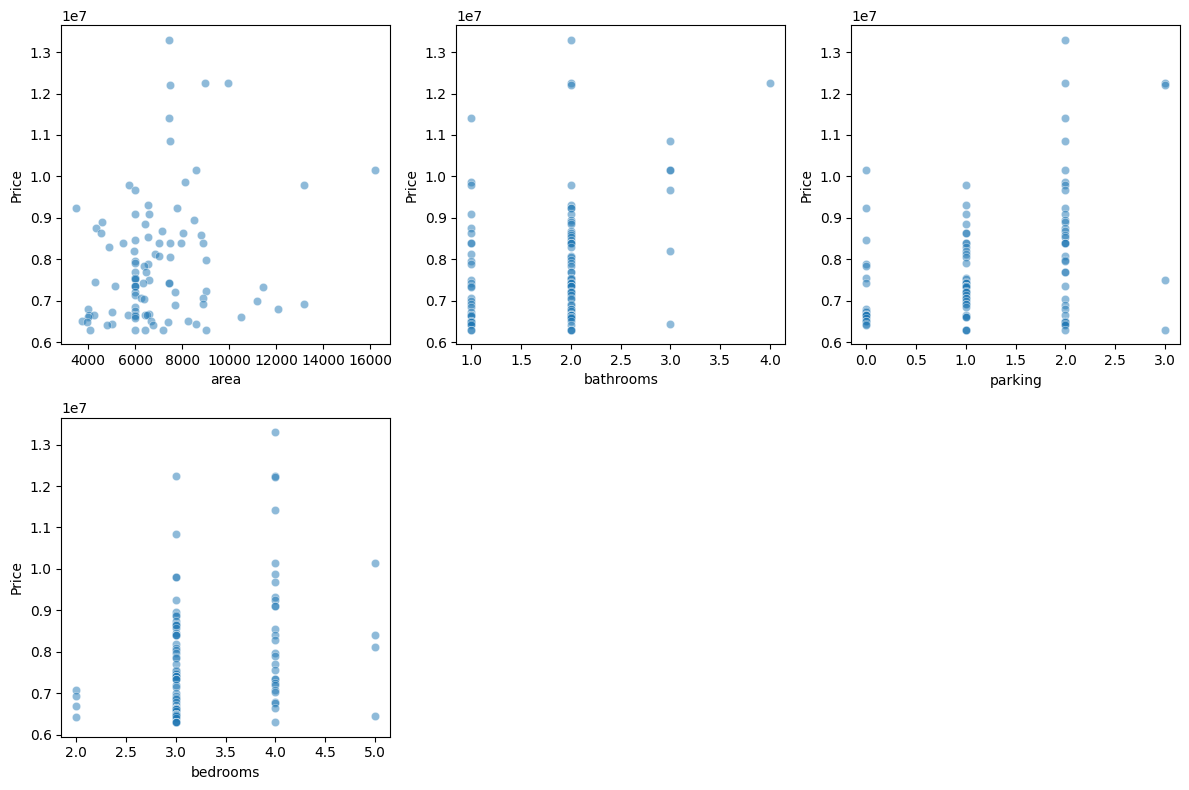

In [ ]:
plt.figure(figsize=(12, 8))
numeric_features = ["area", "bathrooms", "parking", "bedrooms"]

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=db[feature], y=db["price"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

In [ ]:
Y = db["price"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import statsmodels.api as sm
X = sm.add_constant( db["area"] )
X.head(5)

,const,area
0,1.0,7420
1,1.0,8960
2,1.0,9960
3,1.0,7500
4,1.0,7420


In [ ]:
Y = db["price"]

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,
train_size = 0.8,
random_state = 100 )

In [ ]:
price_db = sm.OLS( train_y, train_X ).fit()

In [ ]:
print( price_db.params )

const    6.769099e+06
area     1.686411e+02
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:

X = db[['area']]
y = db['price']


In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
specific_area = 420
predicted_price = model.predict([[specific_area]])

In [ ]:
print(f"Predicted price for an area of {specific_area} m²: {predicted_price[0]:,.2f}")

Predicted price for an area of 420 m²: 6,812,876.05


In [ ]:
hf=db.iloc[0:,list(range(6)) + [-1]]
hf


In [ ]:
X_features=["price"	,"area", "bathroom",  "parking"	,"bedrooms","mainroad","guestroom","furnishingstatus"]
categorical_features = ["price","area", "bathroom",  "parking","bedrooms","mainroad","guestroom",	"furnishingstatus"]
db_data = pd.get_dummies(db[X_features],

columns = categorical_features,
drop_first = True)

KeyError: "['bathroom'] not in index"